<a href="https://colab.research.google.com/github/fatima2020-lab/Simulacion-I/blob/main/MONTECARLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MONTE CARLO DE ACIERTO Y ERROR**


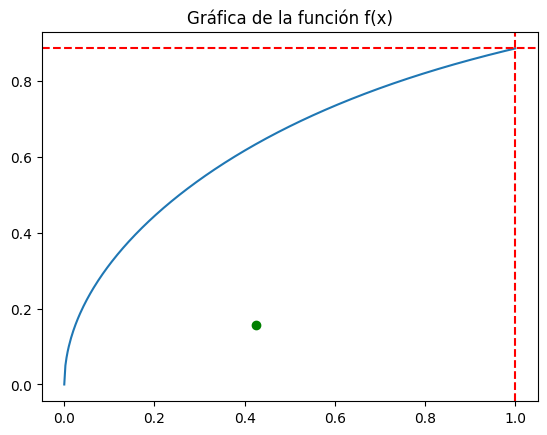

Estimación de la integral con 300 muestras: 0.636667
Error estimado: 0.0021


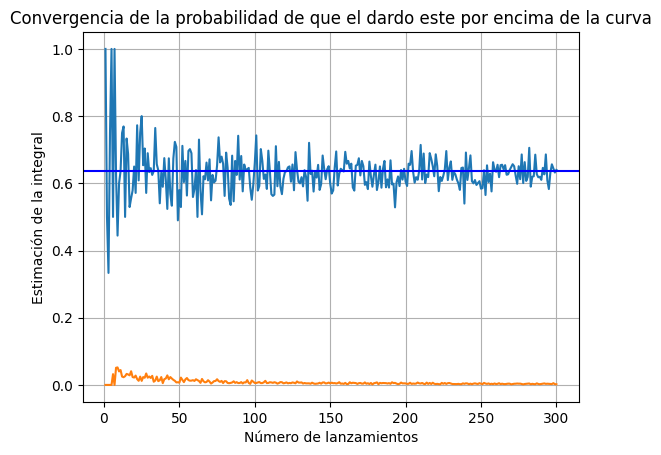

In [ ]:
# Monte Carlo de Acierto y Error.

import matplotlib.pyplot as plt
import numpy as np
import random

# Definir la función
def f(x):
    return np.sqrt(np.arctan(x))  # Función dada

# Gráfica de la función
x = np.linspace(0, 1, 400)
y = f(x)

u1 = random.random()  # Generar numeros aleatorios para u1
u2 = random.random()  # Generar números aleatorios para u2

plt.plot(x, y, label="f(x) = sqrt(arctan(x))")
plt.axhline(f(1), color="red", linestyle="--", label="y = f(1)")
plt.axvline(1, color="red", linestyle="--", label="x = 1")
plt.scatter(u1, u2, color="green", label="Punto aleatorio")
plt.title("Gráfica de la función f(x)")

plt.show()

# Función para calcular la probabilidad con el método de Montecarlo
def dardo(n):
    """ Simula n lanzanzamientos y calcula la probabilidad de u1 y u2 """
    exitos = 0  # Contador de puntos bajo la curva
    resultados = [] # Lista para almacenar las estimaciones en cada iteración

    for _ in range(n):
        u1 = random.random()  # x aleatorio en [0,1]
        u2 = random.random()  # y aleatorio en [0,1]

        if u2 <= f(u1):  # Verificar si está bajo la curva
            exitos += 1

            estimacion_actual = exitos /(_+1)  # Estimación en cada paso
            resultados.append(estimacion_actual)

    # Estimación final
    prob = exitos / n  # Estimación de la probabilidad

    # Calculo del errror estadístico
    sigma = np.std(resultados)  # Desviación estandear de las estimaciones
    error = sigma / np.sqrt(n)  # Error de Monte Carlo

    return prob, error

# Prueba con 10000 muestras
n_muestras = 300

# Ejecutar el método de Monte Carlo
estimacion, error = dardo(n_muestras)

# Mostrar resultados
print(f"Estimación de la integral con {n_muestras} muestras: {estimacion:.6f}")
print(f"Error estimado: {error:.4f}")


# Función para realizar multiples experimentos y graficar la convergencia
def experimentos(m):
    """ Ejecutar m experimentos con lanzamientos y almacena las probabilidades"""
    lista = []
    for i in range(1, m + 1):
        d = dardo(i)
        lista.append(d)
    return lista

# Ejecutar los experimentos y graficarlos
m = 300  # nuúmero de experimentos
lista_probabilidades = experimentos(m)

plt.plot(range(1,m+1), lista_probabilidades, label="Estimación de la probabilidad")
plt.axhline(y=estimacion, color="blue")
plt.title("Convergencia de la probabilidad de que el dardo este por encima de la curva")
plt.xlabel("Número de lanzamientos")
plt.ylabel("Estimación de la integral")
plt.grid(True)
plt.show()